In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
ksi_df = pd.read_csv('Data/KSI.csv')

In [4]:
ksi_df.columns

Index(['X', 'Y', 'INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'HOUR', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'DIVISION',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE',
       'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION', 'HOOD_ID',
       'NEIGHBOURHOOD', 'ObjectId'],
      dtype='object')

In [5]:
ksi_df['DATE'] = pd.to_datetime(ksi_df['DATE'])

ksi_df['MONTH'] = ksi_df['DATE'].dt.month_name()
ksi_df['DAY'] = ksi_df['DATE'].dt.day_name()


<AxesSubplot:ylabel='DAY'>

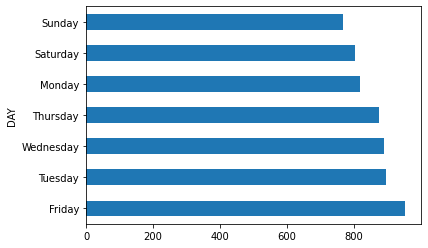

In [6]:
ksi_df.groupby('DAY')['ACCNUM'].nunique().sort_values(ascending = False).plot(kind = 'barh')

<AxesSubplot:xlabel='HOUR'>

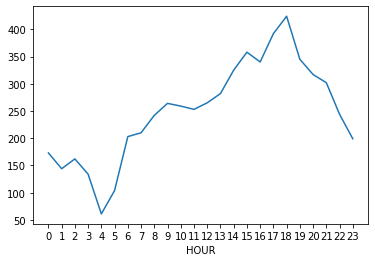

In [7]:
#xticks just makes sure that every hour is plotted instead of 5 hour intervals
ksi_df.sort_values('HOUR', ascending = False).groupby(['HOUR'])['ACCNUM'].nunique().plot(kind = 'line', xticks = range(24))

<AxesSubplot:ylabel='DRIVCOND'>

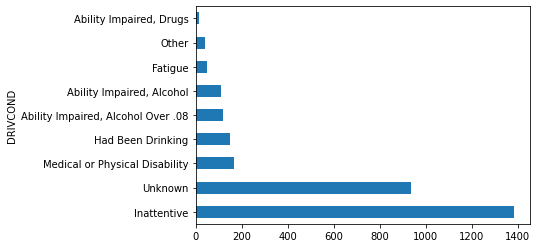

In [8]:
# ignoring Normal and <Null>, keep in mind <Null> means not applicable
ksi_df.groupby('DRIVCOND')['ACCNUM'].nunique().sort_values(ascending = False)[2:].plot(kind = 'barh')

<AxesSubplot:ylabel='DRIVCOND'>

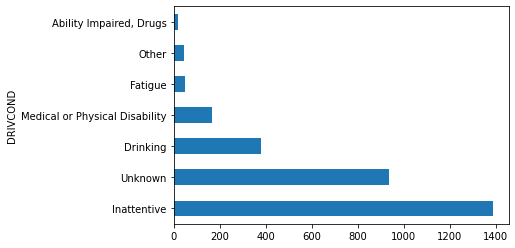

In [9]:
# making small function to collapse all drinking conditions into one

def drivcond(col):
    if col['DRIVCOND'] in ('Ability Impaired, Alcohol Over .08', 'Had Been Drinking', 'Ability Impaired, Alcohol'):
        return 'Drinking'
    
    # if not drinking, return condition
    
    return col['DRIVCOND']
    
ksi_df['DRIVCOND'] = ksi_df.apply(drivcond, axis = 1)
ksi_df.groupby('DRIVCOND')['ACCNUM'].nunique().sort_values(ascending = False)[2:].plot(kind = 'barh')

<AxesSubplot:ylabel='IMPACTYPE'>

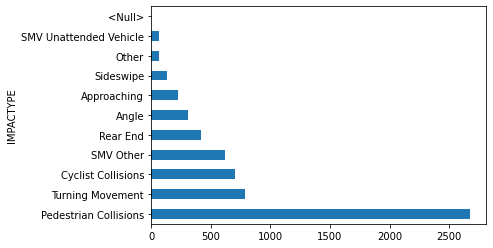

In [10]:
ksi_df.groupby('IMPACTYPE')['ACCNUM'].nunique().sort_values(ascending = False)[0:].plot(kind = 'barh')

In [11]:
ksi_df[ksi_df['ACCNUM'] == 6000607400]

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId,MONTH,DAY
12708,-8.851369e+06,5.425199e+06,80503019,6000607400,2016,2016-04-10 04:00:00+00:00,326,3,JANE ST,SHEPPARD AVE W,<Null>,Major Arterial,Etobicoke York,"7,6",31,43.739379,-79.513202,Intersection,Intersection Related,Traffic Signal,Clear,"Dark, artificial",Dry,Fatal,Rear End,Passenger,20 to 24,Fatal,23,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D31,25,Glenfield-Jane Heights (25),12709,April,Sunday
12709,-8.851369e+06,5.425199e+06,80503077,6000607400,2016,2016-04-10 04:00:00+00:00,326,3,JANE ST,SHEPPARD AVE W,<Null>,Major Arterial,Etobicoke York,"7,6",31,43.739379,-79.513202,Intersection,Intersection Related,Traffic Signal,Clear,"Dark, artificial",Dry,Fatal,Rear End,Passenger,20 to 24,Fatal,24,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D31,25,Glenfield-Jane Heights (25),12710,April,Sunday
12710,-8.851369e+06,5.425199e+06,80503078,6000607400,2016,2016-04-10 04:00:00+00:00,326,3,JANE ST,SHEPPARD AVE W,<Null>,Major Arterial,Etobicoke York,"7,6",31,43.739379,-79.513202,Intersection,Intersection Related,Traffic Signal,Clear,"Dark, artificial",Dry,Fatal,Rear End,Passenger,15 to 19,Fatal,22,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D31,25,Glenfield-Jane Heights (25),12711,April,Sunday
12711,-8.851369e+06,5.425199e+06,80503079,6000607400,2016,2016-04-10 04:00:00+00:00,326,3,JANE ST,SHEPPARD AVE W,<Null>,Major Arterial,Etobicoke York,"7,6",31,43.739379,-79.513202,Intersection,Intersection Related,Traffic Signal,Clear,"Dark, artificial",Dry,Fatal,Rear End,Passenger,20 to 24,Major,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D31,25,Glenfield-Jane Heights (25),12712,April,Sunday
12712,-8.851369e+06,5.425199e+06,80503080,6000607400,2016,2016-04-10 04:00:00+00:00,326,3,JANE ST,SHEPPARD AVE W,<Null>,Major Arterial,Etobicoke York,"7,6",31,43.739379,-79.513202,Intersection,Intersection Related,Traffic Signal,Clear,"Dark, artificial",Dry,Fatal,Rear End,Driver,20 to 24,Major,<Null>,South,"Automobile, Station Wagon",Changing Lanes,Speed too Fast For Condition,Drinking,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D31,25,Glenfield-Jane Heights (25),12713,April,Sunday
12713,-8.851369e+06,5.425199e+06,80503081,6000607400,2016,2016-04-10 04:00:00+00:00,326,3,JANE ST,SHEPPARD AVE W,<Null>,Major Arterial,Etobicoke York,"7,6",31,43.739379,-79.513202,Intersection,Intersection Related,Traffic Signal,Clear,"Dark, artificial",Dry,Fatal,Rear End,Driver,45 to 49,Minor,<Null>,South,"Automobile, Station Wagon",Stopped,Driving Properly,Normal,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D31,25,Glenfield-Jane Heights (25),12714,April,Sunday


<AxesSubplot:ylabel='MANOEUVER'>

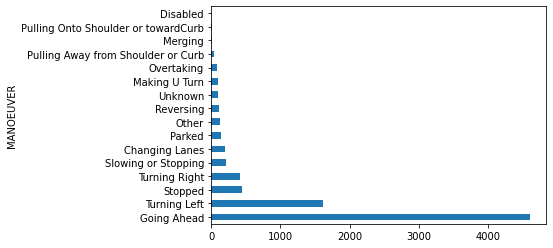

In [12]:
ksi_df[(ksi_df['MANOEUVER'] != '<Null>')].groupby('MANOEUVER')['ACCNUM'].nunique().sort_values(ascending = False).plot(kind = 'barh')

<AxesSubplot:ylabel='MANOEUVER'>

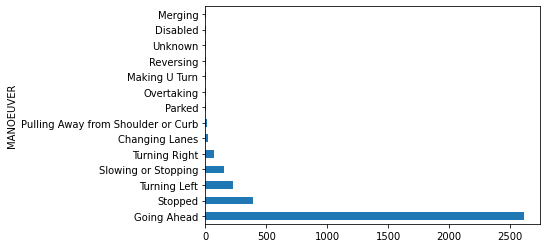

In [13]:
ksi_df[(ksi_df['MANOEUVER'] != '<Null>') & (ksi_df['DRIVACT'] == 'Driving Properly')].groupby('MANOEUVER')['ACCNUM'].nunique().sort_values(ascending = False).plot(kind = 'barh')

<AxesSubplot:ylabel='DRIVACT'>

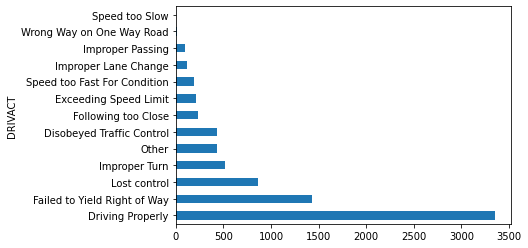

In [14]:
# Looking at DRIVACT just by itself is not that useful
# We must segment

ksi_df[ksi_df['DRIVACT'] != '<Null>'].groupby('DRIVACT')['ACCNUM'].nunique().sort_values(ascending = False).plot(kind = 'barh')

<AxesSubplot:ylabel='MANOEUVER'>

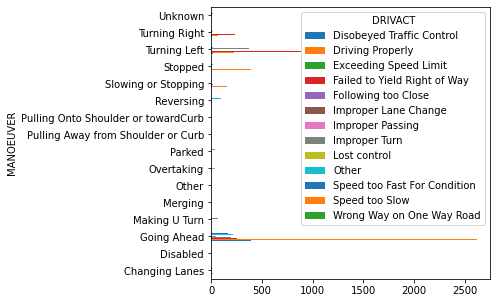

In [15]:
# plotting this in pandas and then did seaborn below - making sure both matches
ksi_df[(ksi_df['MANOEUVER'] != '<Null>') & (ksi_df['DRIVACT'] != '<Null>')].groupby(['MANOEUVER', 'DRIVACT'])['ACCNUM'].nunique().unstack().plot(kind = 'barh', figsize = (5,5))

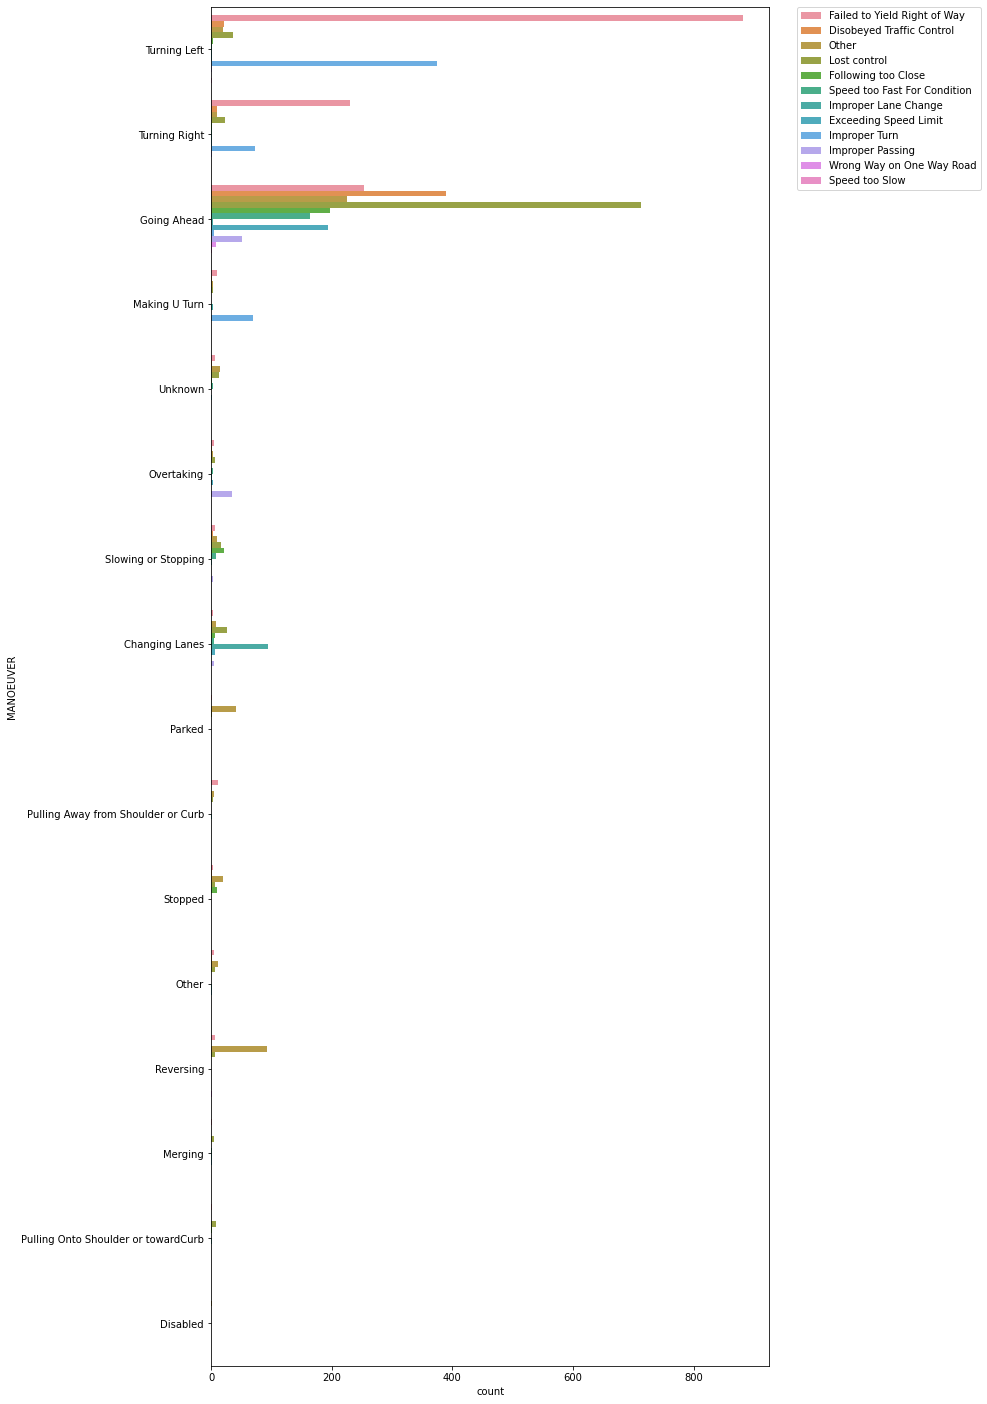

In [17]:
# no need of groupby for this plot

# When turning, drivers don't yield the right of way
# When going ahead, they drive too slow
# When going ahead, they also disobey Traffic Control
# When going ahead, losing control is a major cause of accidents

plt.figure(figsize = (10,25))
sns.countplot(data = ksi_df[(ksi_df['MANOEUVER'] != '<Null>') & (ksi_df['DRIVACT'] != '<Null>') & (ksi_df['DRIVACT'] != 'Driving Properly')], y = 'MANOEUVER', hue = 'DRIVACT')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)